In [22]:
import pandas as pd
import numpy as np

read in data, give better names

In [23]:
df = pd.read_csv('CHI_Study_000/191049/ACC.csv')

columns = df.columns

# Rename columns
new_column_names = {columns[0]: 'x', columns[1]: 'y', columns[-1]: 'z'}
df.rename(columns=new_column_names, inplace=True)

#drop the first row, it records the frequency but not real data
df = df.drop(0)

df

,x,y,z
1,-42.0,41.0,30.0
2,-39.0,40.0,31.0
3,-38.0,40.0,30.0
4,-40.0,40.0,28.0
5,-43.0,40.0,27.0
...,...,...,...
506,26.0,-4.0,56.0
507,24.0,-2.0,56.0
508,25.0,-3.0,56.0
509,26.0,-5.0,57.0


## first lets visualize the acc values

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

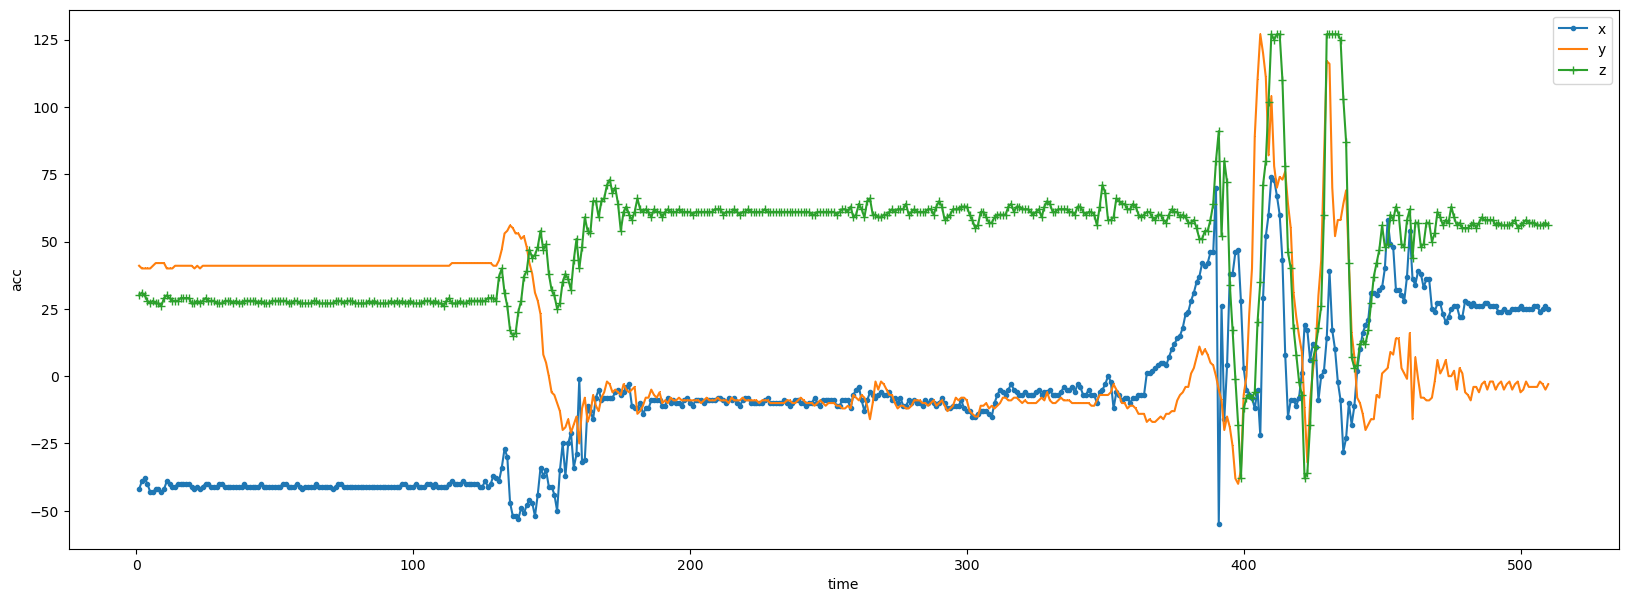

In [25]:
fig, ax = plt.subplots(figsize=(20,7))
ax.plot(df['x'], marker='.', label='x')
ax.plot(df['y'], marker=',', label='y')
ax.plot(df['z'], marker='+', label='z')

ax.set_xlabel('time')
ax.set_ylabel('acc')

ax.legend()

plt.show()

## try to segment it

here, need to create a sumed column for xyz acc values

In [26]:
df.describe()

,x,y,z
count,510.000000,510.000000,510.000000
mean,-10.164706,11.005882,48.484314
std,26.501961,28.350840,22.655070
min,-55.000000,-40.000000,-38.000000
25%,-40.000000,-10.000000,28.000000
50%,-9.000000,-5.000000,57.000000
75%,-2.000000,41.000000,61.000000
max,74.000000,127.000000,127.000000


i wonder if i scaled xyz would give me a better segmentation

In [27]:
from sklearn.preprocessing import StandardScaler

#Create a StandardScaler() object and use it to 
scaler = StandardScaler()
scaled_vars = scaler.fit_transform(df)
df_scaled = pd.DataFrame(scaled_vars, columns=df.columns)
df_scaled

,x,y,z
0,-1.202422,1.059001,-0.816703
1,-1.089112,1.023694,-0.772519
2,-1.051342,1.023694,-0.816703
3,-1.126882,1.023694,-0.905070
4,-1.240192,1.023694,-0.949254
...,...,...,...
505,1.365945,-0.529812,0.332070
506,1.290404,-0.459198,0.332070
507,1.328175,-0.494505,0.332070
508,1.365945,-0.565119,0.376253


create sum column for both df

In [28]:
df['sum'] = df['x'] + df['y'] + df['z']
df

,x,y,z,sum
1,-42.0,41.0,30.0,29.0
2,-39.0,40.0,31.0,32.0
3,-38.0,40.0,30.0,32.0
4,-40.0,40.0,28.0,28.0
5,-43.0,40.0,27.0,24.0
...,...,...,...,...
506,26.0,-4.0,56.0,78.0
507,24.0,-2.0,56.0,78.0
508,25.0,-3.0,56.0,78.0
509,26.0,-5.0,57.0,78.0


In [29]:
df.isna().sum()

x      0
y      0
z      0
sum    0
dtype: int64

In [30]:
df_scaled['sum'] = df_scaled['x'] + df_scaled['y'] + df_scaled['z']
df_scaled

,x,y,z,sum
0,-1.202422,1.059001,-0.816703,-0.960124
1,-1.089112,1.023694,-0.772519,-0.837937
2,-1.051342,1.023694,-0.816703,-0.844351
3,-1.126882,1.023694,-0.905070,-1.008258
4,-1.240192,1.023694,-0.949254,-1.165752
...,...,...,...,...
505,1.365945,-0.529812,0.332070,1.168203
506,1.290404,-0.459198,0.332070,1.163276
507,1.328175,-0.494505,0.332070,1.165739
508,1.365945,-0.565119,0.376253,1.177079


In [31]:
df_scaled.isna().sum()

x      0
y      0
z      0
sum    0
dtype: int64

from the plot, we mainly see 4 bins

In [32]:
df_copy = df.copy()

bin_num = 4

df_copy['range'] = pd.cut(df_copy['sum'], bins=bin_num)
df_copy['segment'] = pd.cut(df_copy['sum'], bins=bin_num, labels=np.arange(0, bin_num))

# make sure segment is numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_copy['segment'] = le.fit_transform(df_copy['segment'])

df_copy

,x,y,z,sum,range,segment
1,-42.0,41.0,30.0,29.0,"(-51.356, 38.0]",0
2,-39.0,40.0,31.0,32.0,"(-51.356, 38.0]",0
3,-38.0,40.0,30.0,32.0,"(-51.356, 38.0]",0
4,-40.0,40.0,28.0,28.0,"(-51.356, 38.0]",0
5,-43.0,40.0,27.0,24.0,"(-51.356, 38.0]",0
...,...,...,...,...,...,...
506,26.0,-4.0,56.0,78.0,"(38.0, 127.0]",1
507,24.0,-2.0,56.0,78.0,"(38.0, 127.0]",1
508,25.0,-3.0,56.0,78.0,"(38.0, 127.0]",1
509,26.0,-5.0,57.0,78.0,"(38.0, 127.0]",1


In [33]:
df_copy['segment'].value_counts()

1    289
0    200
2     11
3     10
Name: segment, dtype: int64

lets see if it works

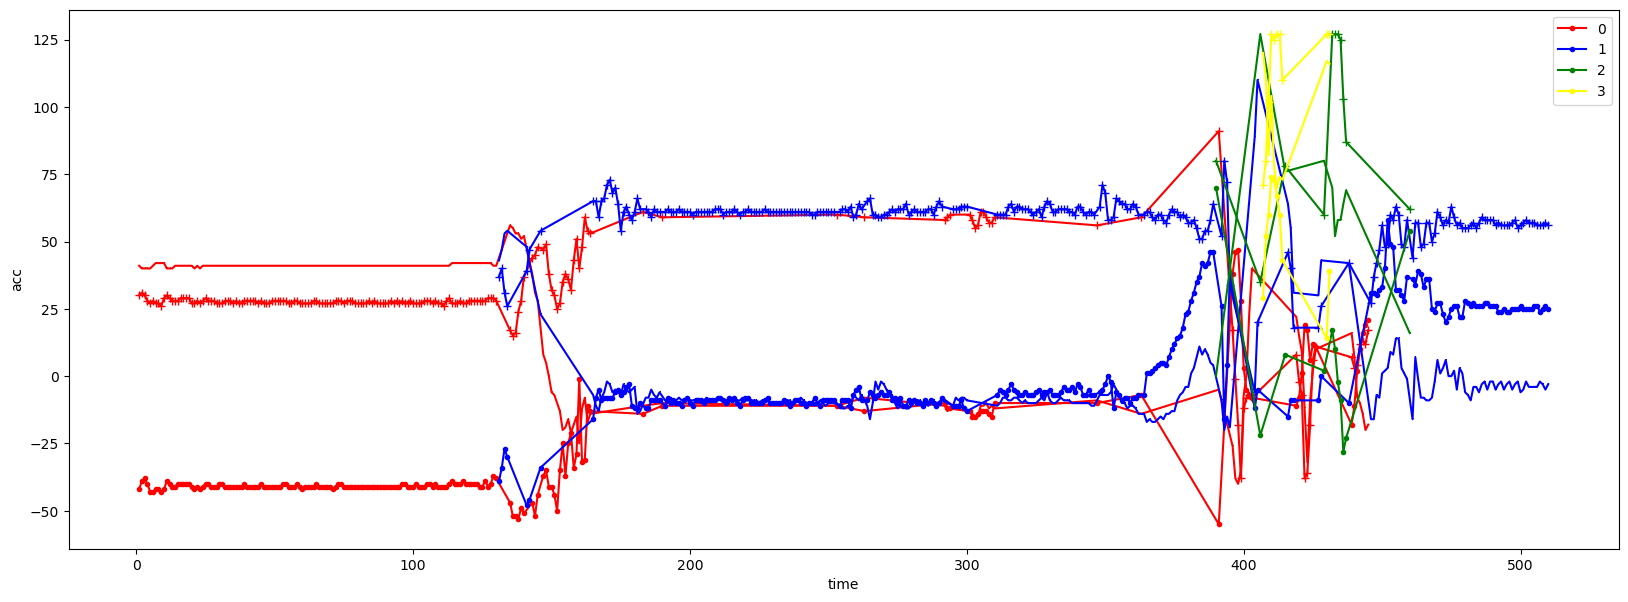

In [34]:
# Create a dictionary to map segments to colors
segment_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}  # Define your colors as needed

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 7))

# Loop through each segment and plot lines connecting the points
for segment, group in df_copy.groupby('segment'):
    ax.plot(group.index, group['x'], marker='.', label=f'{segment}', color=segment_colors[segment])
    ax.plot(group.index, group['y'], marker=',', color=segment_colors[segment])
    ax.plot(group.index, group['z'], marker='+', color=segment_colors[segment])

# Set x and y axis labels
ax.set_xlabel('time')
ax.set_ylabel('acc')

# Create a legend
ax.legend()

# Show the plot
plt.show()

worked poorly, what about scaled?

In [35]:
df_scaled_copy = df_scaled.copy()

bin_num = 4

df_scaled_copy['range'] = pd.cut(df_scaled_copy['sum'], bins=bin_num)
df_scaled_copy['segment'] = pd.cut(df_scaled_copy['sum'], bins=bin_num, labels=np.arange(0, bin_num))

# make sure segment is numeric
df_scaled_copy['segment'] = le.fit_transform(df_scaled_copy['segment'])

df_scaled_copy

,x,y,z,sum,range,segment
0,-1.202422,1.059001,-0.816703,-0.960124,"(-4.239, -0.686]",0
1,-1.089112,1.023694,-0.772519,-0.837937,"(-4.239, -0.686]",0
2,-1.051342,1.023694,-0.816703,-0.844351,"(-4.239, -0.686]",0
3,-1.126882,1.023694,-0.905070,-1.008258,"(-4.239, -0.686]",0
4,-1.240192,1.023694,-0.949254,-1.165752,"(-4.239, -0.686]",0
...,...,...,...,...,...,...
505,1.365945,-0.529812,0.332070,1.168203,"(-0.686, 2.853]",1
506,1.290404,-0.459198,0.332070,1.163276,"(-0.686, 2.853]",1
507,1.328175,-0.494505,0.332070,1.165739,"(-0.686, 2.853]",1
508,1.365945,-0.565119,0.376253,1.177079,"(-0.686, 2.853]",1


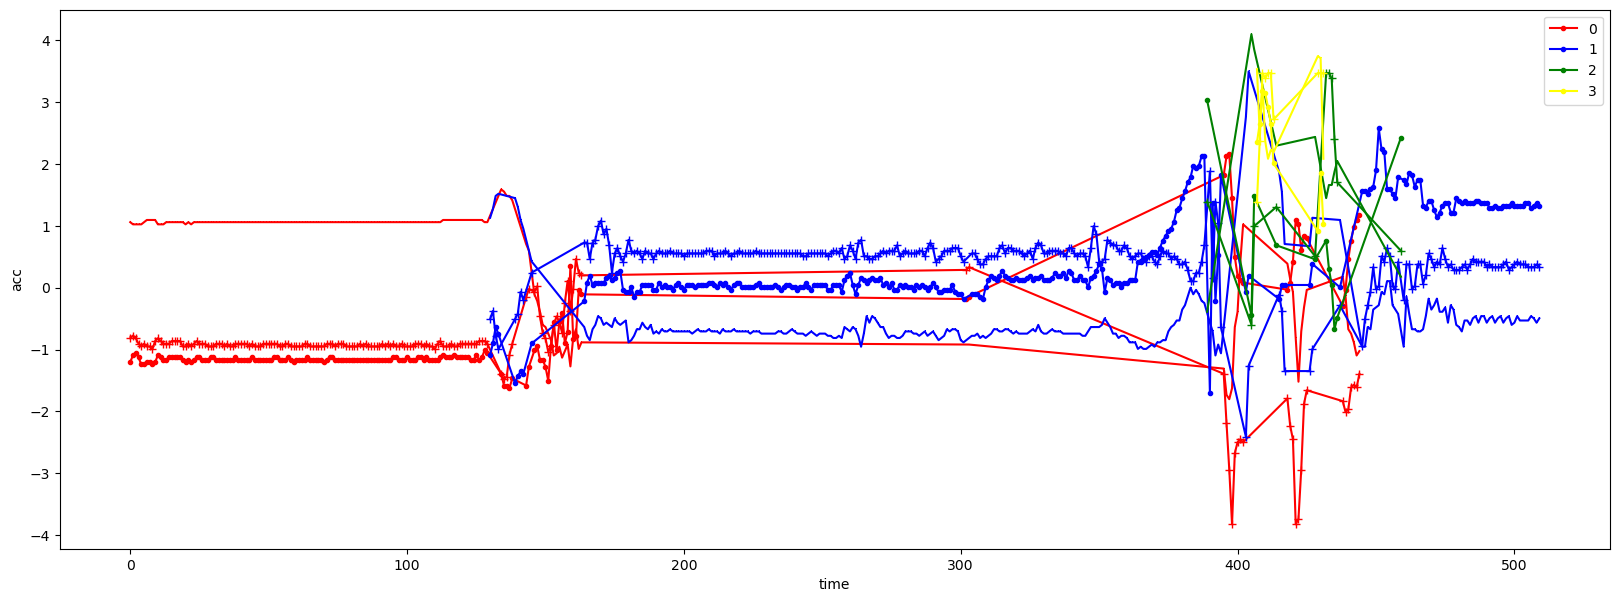

In [36]:
# Create a dictionary to map segments to colors
segment_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}  # Define your colors as needed

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 7))

# Loop through each segment and plot lines connecting the points
for segment, group in df_scaled_copy.groupby('segment'):
    ax.plot(group.index, group['x'], marker='.', label=f'{segment}', color=segment_colors[segment])
    ax.plot(group.index, group['y'], marker=',', color=segment_colors[segment])
    ax.plot(group.index, group['z'], marker='+', color=segment_colors[segment])

# Set x and y axis labels
ax.set_xlabel('time')
ax.set_ylabel('acc')

# Create a legend
ax.legend()

# Show the plot
plt.show()

even poorer

## it seems using a sumed column make it lose some original segmentation, or i picked the wrong way to come up with a sum column, let me try using xyz's own labels instead of suming

In [37]:
df_copy2 = df.copy()

bin_num = 4

df_copy2['x_range'] = pd.cut(df_copy2['x'], bins=bin_num)
df_copy2['x_segment'] = pd.cut(df_copy2['x'], bins=bin_num, labels=np.arange(0, bin_num))
#df_copy2['x_segment'] = le.fit_transform(df_copy2['x_segment'])

df_copy2['y_range'] = pd.cut(df_copy2['y'], bins=bin_num)
df_copy2['y_segment'] = pd.cut(df_copy2['y'], bins=bin_num, labels=np.arange(0, bin_num))
#df_copy2['y_segment'] = le.fit_transform(df_copy2['y_segment'])

df_copy2['z_range'] = pd.cut(df_copy2['z'], bins=bin_num)
df_copy2['z_segment'] = pd.cut(df_copy2['z'], bins=bin_num, labels=np.arange(0, bin_num))
#df_copy2['z_segment'] = le.fit_transform(df_copy2['z_segment'])

df_copy2

,x,y,z,sum,x_range,x_segment,y_range,y_segment,z_range,z_segment
1,-42.0,41.0,30.0,29.0,"(-55.129, -22.75]",0,"(1.75, 43.5]",1,"(3.25, 44.5]",1
2,-39.0,40.0,31.0,32.0,"(-55.129, -22.75]",0,"(1.75, 43.5]",1,"(3.25, 44.5]",1
3,-38.0,40.0,30.0,32.0,"(-55.129, -22.75]",0,"(1.75, 43.5]",1,"(3.25, 44.5]",1
4,-40.0,40.0,28.0,28.0,"(-55.129, -22.75]",0,"(1.75, 43.5]",1,"(3.25, 44.5]",1
5,-43.0,40.0,27.0,24.0,"(-55.129, -22.75]",0,"(1.75, 43.5]",1,"(3.25, 44.5]",1
...,...,...,...,...,...,...,...,...,...,...
506,26.0,-4.0,56.0,78.0,"(9.5, 41.75]",2,"(-40.167, 1.75]",0,"(44.5, 85.75]",2
507,24.0,-2.0,56.0,78.0,"(9.5, 41.75]",2,"(-40.167, 1.75]",0,"(44.5, 85.75]",2
508,25.0,-3.0,56.0,78.0,"(9.5, 41.75]",2,"(-40.167, 1.75]",0,"(44.5, 85.75]",2
509,26.0,-5.0,57.0,78.0,"(9.5, 41.75]",2,"(-40.167, 1.75]",0,"(44.5, 85.75]",2


lets see if the segmentation labels agree with each other

In [38]:
from sklearn.metrics import adjusted_rand_score

# Calculate Rand Score
ri = adjusted_rand_score(df_copy2['x_segment'], df_copy2['y_segment'])
print(f'Kappa between x and y (rand): {ri}')

ri = adjusted_rand_score(df_copy2['x_segment'], df_copy2['z_segment'])
print(f'Kappa between x and z (rand): {ri}')

ri = adjusted_rand_score(df_copy2['y_segment'], df_copy2['z_segment'])
print(f'Kappa between y and z (rand): {ri}')

Kappa between x and y (rand): 0.4523075048390399
Kappa between x and z (rand): 0.4806949507447971
Kappa between y and z (rand): 0.5659252547098521


In [39]:
from sklearn.metrics import cohen_kappa_score

# Calculate Cohen's Kappa
kappa = cohen_kappa_score(df_copy2['x_segment'], df_copy2['y_segment'])
print(f'Kappa between x and y (kappa): {kappa}')

kappa = cohen_kappa_score(df_copy2['x_segment'], df_copy2['z_segment'])
print(f'Kappa between x and z (kappa): {kappa}')

kappa = cohen_kappa_score(df_copy2['y_segment'], df_copy2['z_segment'])
print(f'Kappa between y and z (kappa): {kappa}')

Kappa between x and y (kappa): -0.47367916214547345
Kappa between x and z (kappa): -0.1409638490193057
Kappa between y and z (kappa): 0.16638735715039998


the labels barely agree

lets see

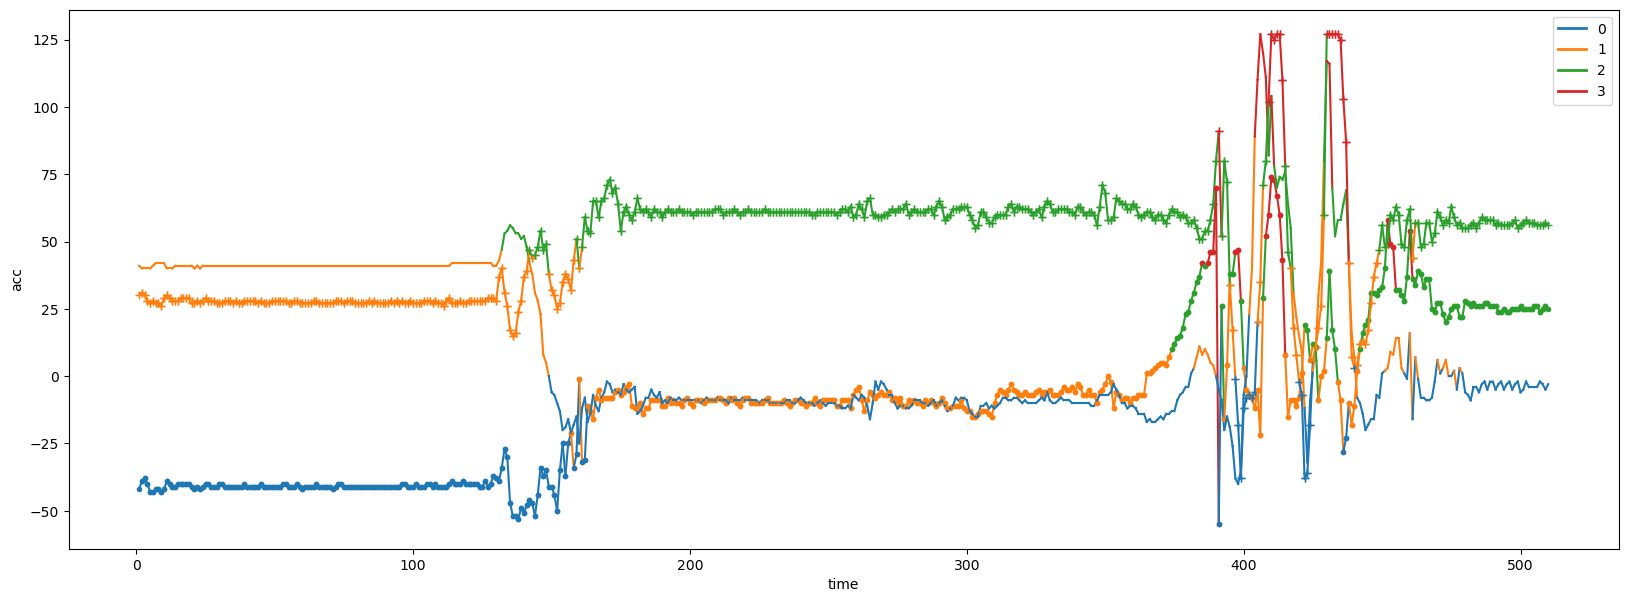

In [40]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

# Generate a colormap
colors = list(mcolors.TABLEAU_COLORS.values())
max_segment = max(df_copy2['x_segment'].max(), df_copy2['y_segment'].max(), df_copy2['z_segment'].max())
colormap = {i: colors[i % len(colors)] for i in range(max_segment + 1)}

fig, ax = plt.subplots(figsize=(20, 7))

# Iterate through the dataframe rows to plot segments with distinct colors
for i in range(1, len(df_copy2)):
    ax.plot(df_copy2['x'].iloc[i-1:i+1], c=colormap[df_copy2['x_segment'].iloc[i-1]], marker='.')
    ax.plot(df_copy2['y'].iloc[i-1:i+1], c=colormap[df_copy2['y_segment'].iloc[i-1]], marker=',')
    ax.plot(df_copy2['z'].iloc[i-1:i+1], c=colormap[df_copy2['z_segment'].iloc[i-1]], marker='+')

ax.set_xlabel('time')
ax.set_ylabel('acc')

# Create custom legend entries based on colormap
legend_entries = [plt.Line2D([0], [0], color=colormap[key], lw=2, label=str(key)) for key in colormap.keys()]
ax.legend(handles=legend_entries)

plt.show()

## still much overlapping, what about try bin_num=2?

with sum

In [41]:
df = pd.read_csv('CHI_Study_000/191049/ACC.csv')

columns = df.columns

# Rename columns
new_column_names = {columns[0]: 'x', columns[1]: 'y', columns[-1]: 'z'}
df.rename(columns=new_column_names, inplace=True)

#drop the first row, it records the frequency but not real data
df = df.drop(0)

df['sum'] = df['x'] + df['y'] + df['z']
df

df

,x,y,z,sum
1,-42.0,41.0,30.0,29.0
2,-39.0,40.0,31.0,32.0
3,-38.0,40.0,30.0,32.0
4,-40.0,40.0,28.0,28.0
5,-43.0,40.0,27.0,24.0
...,...,...,...,...
506,26.0,-4.0,56.0,78.0
507,24.0,-2.0,56.0,78.0
508,25.0,-3.0,56.0,78.0
509,26.0,-5.0,57.0,78.0


In [42]:
df_copy = df.copy()

bin_num = 2

df_copy['range'] = pd.cut(df_copy['sum'], bins=bin_num)
df_copy['segment'] = pd.cut(df_copy['sum'], bins=bin_num, labels=np.arange(0, bin_num))

# make sure segment is numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_copy['segment'] = le.fit_transform(df_copy['segment'])

df_copy

,x,y,z,sum,range,segment
1,-42.0,41.0,30.0,29.0,"(-51.356, 127.0]",0
2,-39.0,40.0,31.0,32.0,"(-51.356, 127.0]",0
3,-38.0,40.0,30.0,32.0,"(-51.356, 127.0]",0
4,-40.0,40.0,28.0,28.0,"(-51.356, 127.0]",0
5,-43.0,40.0,27.0,24.0,"(-51.356, 127.0]",0
...,...,...,...,...,...,...
506,26.0,-4.0,56.0,78.0,"(-51.356, 127.0]",0
507,24.0,-2.0,56.0,78.0,"(-51.356, 127.0]",0
508,25.0,-3.0,56.0,78.0,"(-51.356, 127.0]",0
509,26.0,-5.0,57.0,78.0,"(-51.356, 127.0]",0


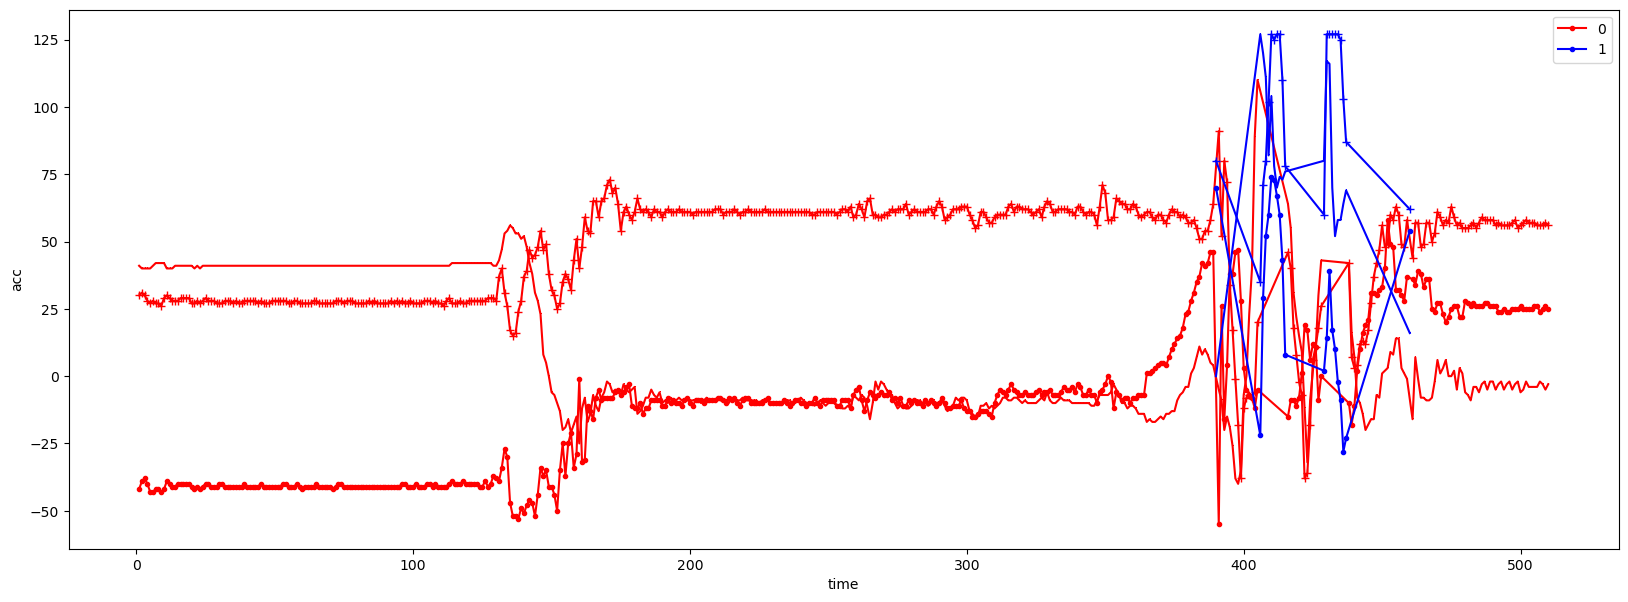

In [43]:
# Create a dictionary to map segments to colors
segment_colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow'}  # Define your colors as needed

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(20, 7))

# Loop through each segment and plot lines connecting the points
for segment, group in df_copy.groupby('segment'):
    ax.plot(group.index, group['x'], marker='.', label=f'{segment}', color=segment_colors[segment])
    ax.plot(group.index, group['y'], marker=',', color=segment_colors[segment])
    ax.plot(group.index, group['z'], marker='+', color=segment_colors[segment])

# Set x and y axis labels
ax.set_xlabel('time')
ax.set_ylabel('acc')

# Create a legend
ax.legend()

# Show the plot
plt.show()